In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score, matthews_corrcoef, f1_score
from sklearn.model_selection import cross_val_score
import logging
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
from scipy.stats import ttest_ind
import scipy.stats  as stats
import networkx as nx
from joblib import dump, load
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedShuffleSplit
import pickle
import xgboost as xgb
#print(sklearn.__version__)
import import_ipynb
from PPI_functions import *


1.26.3
2.1.4
3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
importing Jupyter notebook from PPI_functions.ipynb
1.26.3
2.1.4
3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


## source of data
## https://github.com/mlbioinfolab/ppi-metago/blob/master/protein_pair/EC2/EC2_pair.txt

## publication: https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-019-2907-1

In [7]:

network_name='AT'


# Step0: Visualization of the network

In [8]:
#G4=network_vis(network_name,path_h)
#!pip install xgboost scikit-learn


# Step 1: Feature extraction using propy


In [9]:

#Descriptors_complete(network_name+'_sequence_fasta.txt',network_name+'_descriptors.csv')

# Step 2: Calculate PP distance

In [10]:
# distance_PP(network_name)

# Step 3: Upload data and train/test spilit

In [13]:
#X,y,klist,df3=load_network_data(network_name, path_h)
    
df0 = pd.read_csv( network_name + "_distance.csv")
df = df0.drop(columns=['Unnamed: 0'])
df2 = df.drop(columns=['PPI_names'])
df3 = df.drop(columns=['PPI_names', 'PPI'])
    
XX = np.array(df3)
yy = np.array(df2['PPI'])
X=np.array(XX)
y=np.array(yy)
klist = np.array(df3.columns)
    
X

array([[0.05109489, 0.12140641, 0.0249217 , ..., 0.038976  , 0.10159541,
        0.17447051],
       [0.00729927, 0.14388142, 0.05199105, ..., 0.217856  , 0.08851308,
        0.08492525],
       [0.02919708, 0.18097208, 0.06402685, ..., 0.019968  , 0.10823229,
        0.00399709],
       ...,
       [0.03649635, 0.24419166, 0.0242953 , ..., 0.144576  , 0.06598596,
        0.24283638],
       [0.08759124, 0.01640814, 0.12836689, ..., 0.068736  , 0.49349075,
        0.26578073],
       [0.0620438 , 0.08107549, 0.06451902, ..., 0.1792    , 0.09042757,
        0.15438123]])

In [12]:
ns = 18
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)

NameError: name 'X' is not defined

# Step 4: Train logistic and SVM models using all features

In [7]:
all_features_traning_results = models_crossval(Xtrain_cv,Ytrain_cv,ns)


/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [8]:
all_features_traning_results

{'average logistic regression accuracy:': 0.9731535003211302,
 'average SVM accuracy:': 0.9494540783558124,
 'average logistic regression recall:': 0.9731470789496193,
 'average SVM recall:': 0.9494340375787643,
 'average logistic regression matthews_corrcoef:': 0.9465308042363796,
 'average SVM matthews_corrcoef:': 0.9003747061640129,
 'average logistic regression f1 score:': 0.9465308042363796,
 'average SVM f1 score:': 0.9003747061640129}

In [9]:

## Save dat into pickle file
data_save = {}
data_save['all_features_traning_results']=all_features_traning_results

## Evaluate the model's performance to determine if there is overfitting.


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
# Your initial setup
ns=5
Y = y
cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
fold_num=0
# Splitting
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    # Now you have a train-test split, you can proceed with your analysis
    # For instance, 
    fold_num += 1  # Increment the fold counter
    print('Processing cross validation for fold:', fold_num)
    results = models_overfitting(X_train, Y_train, X_test, Y_test)


Processing cross validation for fold: 1
Logistic Regression train_accuracy: 0.9723
Logistic Regression test_accuracy: 0.7235
Logistic Regression train_recall: 0.9722
Logistic Regression test_recall: 0.7238
Logistic Regression train_mcc: 0.9449
Logistic Regression test_mcc: 0.4511
Logistic Regression train_f1: 0.9727
Logistic Regression test_f1: 0.7391


SVC train_accuracy: 0.9480
SVC test_accuracy: 0.7327
SVC train_recall: 0.9479
SVC test_recall: 0.7329
SVC train_mcc: 0.8986
SVC test_mcc: 0.4676
SVC train_f1: 0.9499
SVC test_f1: 0.7434


Processing cross validation for fold: 2


/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression train_accuracy: 0.9642
Logistic Regression test_accuracy: 0.6959
Logistic Regression train_recall: 0.9642
Logistic Regression test_recall: 0.6956
Logistic Regression train_mcc: 0.9286
Logistic Regression test_mcc: 0.3938
Logistic Regression train_f1: 0.9646
Logistic Regression test_f1: 0.7130


SVC train_accuracy: 0.9480
SVC test_accuracy: 0.6820
SVC train_recall: 0.9480
SVC test_recall: 0.6817
SVC train_mcc: 0.8983
SVC test_mcc: 0.3663
SVC train_f1: 0.9497
SVC test_f1: 0.7013


Processing cross validation for fold: 3
Logistic Regression train_accuracy: 0.9792
Logistic Regression test_accuracy: 0.7373
Logistic Regression train_recall: 0.9792
Logistic Regression test_recall: 0.7373
Logistic Regression train_mcc: 0.9585
Logistic Regression test_mcc: 0.4746
Logistic Regression train_f1: 0.9794
Logistic Regression test_f1: 0.7349


SVC train_accuracy: 0.9642
SVC test_accuracy: 0.7235
SVC train_recall: 0.9641
SVC test_recall: 0.7236
SVC train_mcc: 0.9285
SVC test_mcc: 0.

# Step 5: Feature Selection Using LASSO Regression

In [29]:
AA=0.004
ns = 15
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)
featuredict_lasso = lasso_feature_selection(Xtrain_cv,Ytrain_cv,AA,ns,klist)
featuredict_lasso

AP -0.17864449295374396
DI -0.24846536406857625
QS 0.08145037021594484
IN -0.08154314522530237
LY -0.09457647787279311
MV -0.10587959703844119
PI -0.127847164489396
SQ 0.09589148571247842
YH 0.09429517474240802
YP -0.08994548117159006
VH 0.13344391697712613
_ChargeC1 -0.5132609778718181
tausw45 -0.2570181568385637


{'AP': -0.17864449295374396,
 'DI': -0.24846536406857625,
 'QS': 0.08145037021594484,
 'IN': -0.08154314522530237,
 'LY': -0.09457647787279311,
 'MV': -0.10587959703844119,
 'PI': -0.127847164489396,
 'SQ': 0.09589148571247842,
 'YH': 0.09429517474240802,
 'YP': -0.08994548117159006,
 'VH': 0.13344391697712613,
 '_ChargeC1': -0.5132609778718181,
 'tausw45': -0.2570181568385637}

In [30]:
data_save['selected_features_lasso']=featuredict_lasso

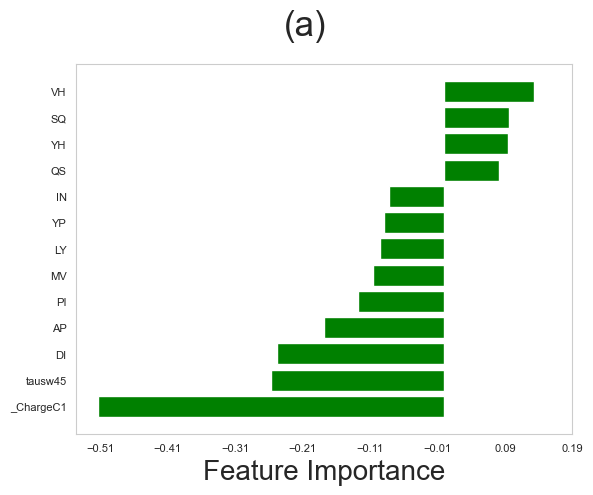

In [31]:

sorted_dict = sorted(featuredict_lasso.items(), key=lambda x: x[1])
# Get the 10 highest positive keys
positive_keys = dict(sorted_dict[-8:])
# Get the 10 lowest negative keys
negative_keys = dict(sorted_dict[:8])
# Create a new dictionary containing the selected keys
new_dict = {**positive_keys, **negative_keys}
featuredict=new_dict
dr=0.1
selected_features_plotter(featuredict,network_name,'lasso',20,dr)


## Now we train model using features selection from LASSO mothod

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
# Your initial setup
ns=10
scaled_features_df=df3
mean_accu_log=0
mean_accu_svm=0
mean_recall_log=0
mean_recall_svm=0
mean_mcc_log=0
mean_mcc_svm=0
mean_f1_log=0
mean_f1_svm=0
cols=list(featuredict_lasso.keys())
XX=np.array(scaled_features_df[cols])
cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
fold_num=0
# Splitting
for train_index, test_index in cv.split(XX, y):
    X_train, X_test = XX[train_index], XX[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    # Now you have a train-test split, you can proceed with your analysis
    # For instance, 
    fold_num += 1  # Increment the fold counter
    print('Processing cross validation for fold:', fold_num)
    #results = models_overfitting2(X_train, Y_train, X_test, Y_test)
    #... rest of your code
    results = models_overfitting(X_train, Y_train, X_test, Y_test)
    mean_accu_log = mean_accu_log + results['logistic_regression']['test_accuracy']
    mean_accu_svm = mean_accu_svm + results['svc']['test_accuracy']
    mean_recall_log = mean_recall_log + results['logistic_regression']['test_recall']
    mean_recall_svm = mean_recall_svm + results['svc']['test_recall']
    mean_mcc_log = mean_mcc_log + results['logistic_regression']['test_mcc']
    mean_mcc_svm = mean_mcc_svm + results['svc']['test_mcc']
    mean_f1_log = mean_f1_log + results['logistic_regression']['test_f1']
    mean_f1_svm = mean_f1_svm + results['svc']['test_f1']
    
print('mean accuracy for log regression is' , mean_accu_log/ns)
print('mean accuracy for svm is' , mean_accu_svm/ns)
print('mean recall for log regression is' , mean_recall_log/ns)
print('mean recall for svm is' , mean_recall_svm/ns)
print('mean mcc for log regression is' , mean_mcc_log/ns)
print('mean mcc for svm is' , mean_mcc_svm/ns)
print('mean f1 for log regression is' , mean_f1_log/ns)
print('mean f1 for svm is' , mean_f1_svm/ns)

Processing cross validation for fold: 1
Logistic Regression train_accuracy: 0.6740
Logistic Regression test_accuracy: 0.7005
Logistic Regression train_recall: 0.6740
Logistic Regression test_recall: 0.7009
Logistic Regression train_mcc: 0.3481
Logistic Regression test_mcc: 0.4092
Logistic Regression train_f1: 0.6795
Logistic Regression test_f1: 0.7257


SVC train_accuracy: 0.7757
SVC test_accuracy: 0.6774
SVC train_recall: 0.7757
SVC test_recall: 0.6778
SVC train_mcc: 0.5517
SVC test_mcc: 0.3592
SVC train_f1: 0.7795
SVC test_f1: 0.6983


Processing cross validation for fold: 2
Logistic Regression train_accuracy: 0.6994
Logistic Regression test_accuracy: 0.6452
Logistic Regression train_recall: 0.6995
Logistic Regression test_recall: 0.6450
Logistic Regression train_mcc: 0.3996
Logistic Regression test_mcc: 0.2905
Logistic Regression train_f1: 0.7079
Logistic Regression test_f1: 0.6547


SVC train_accuracy: 0.7896
SVC test_accuracy: 0.6313
SVC train_recall: 0.7896
SVC test_recall: 0.631

In [33]:
scaled_features_df=df3
cols=list(featuredict_lasso.keys())
XX=np.array(scaled_features_df[cols])
i = 0
from sklearn.model_selection import StratifiedShuffleSplit

Xtrain_cv = list(range(ns))
Xtest_cv = list(range(ns))
Ytrain_cv = list(range(ns))
Ytest_cv = list(range(ns))

cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
for train_index, test_index in cv.split(XX, y):
    Xtrain_cv[i] = XX[train_index]
    Xtest_cv[i] = XX[test_index]
    Ytrain_cv[i] = y[train_index]
    Ytest_cv[i] = y[test_index]
    
    i+=1
    #print(i)
    

In [34]:
# traning metrics
lasso_results = models_crossval(Xtrain_cv,Ytrain_cv,ns)
lasso_results

{'average logistic regression accuracy:': 0.689942196531792,
 'average SVM accuracy:': 0.7791907514450866,
 'average logistic regression recall:': 0.6899257441621761,
 'average SVM recall:': 0.7791789624497476,
 'average logistic regression matthews_corrcoef:': 0.3803719479555286,
 'average SVM matthews_corrcoef:': 0.5588978498317492,
 'average logistic regression f1 score:': 0.3803719479555286,
 'average SVM f1 score:': 0.5588978498317492}

In [35]:
data_save['lasso_results']=lasso_results

# Step 7: Feature Selection Using Support Vector Machine

In [36]:
ns = 15
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)

In [37]:

CC = linear_SVM_grid_search(X,y,ns)
#CC=0.2
CC

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.1

In [38]:
featuredict_svm = svm_feature_selection(Xtrain_cv,Ytrain_cv,CC,ns,klist)
featuredict_svm

AP -0.4077629631805706
NF 0.2823821798865562
DI -0.54881520822793
DS 0.2663728948109532
QS 0.2544218268589569
IN -0.20778233044991637
LY -0.2439961038815683
KN 0.14084354478138603
MV -0.20066595173838292
PI -0.23598730311142493
SQ 0.33248350648249264
TP 0.14368524658045917
YH 0.3363594110512807
YP -0.22676520751239668
VH 0.21711731344973734
VL -0.26428393563782276
GearyAuto_Hydrophobicity5 -0.2851501292088007
_SecondaryStrC2 -0.18599174561237117
_ChargeC1 -1.021744156314833
PAAC14 -0.2671936298132232
taugrant45 -0.3136691065649092


{'AP': -0.4077629631805706,
 'NF': 0.2823821798865562,
 'DI': -0.54881520822793,
 'DS': 0.2663728948109532,
 'QS': 0.2544218268589569,
 'IN': -0.20778233044991637,
 'LY': -0.2439961038815683,
 'KN': 0.14084354478138603,
 'MV': -0.20066595173838292,
 'PI': -0.23598730311142493,
 'SQ': 0.33248350648249264,
 'TP': 0.14368524658045917,
 'YH': 0.3363594110512807,
 'YP': -0.22676520751239668,
 'VH': 0.21711731344973734,
 'VL': -0.26428393563782276,
 'GearyAuto_Hydrophobicity5': -0.2851501292088007,
 '_SecondaryStrC2': -0.18599174561237117,
 '_ChargeC1': -1.021744156314833,
 'PAAC14': -0.2671936298132232,
 'taugrant45': -0.3136691065649092}

In [39]:
data_save['selected_features_svm']=featuredict_svm

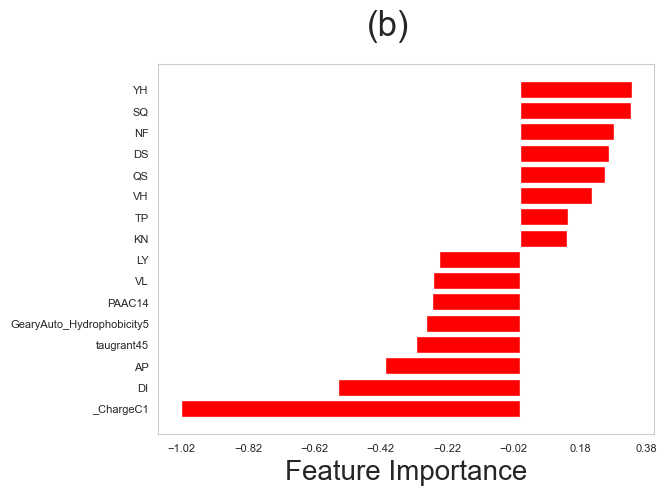

In [46]:

sorted_dict = sorted(featuredict_svm.items(), key=lambda x: x[1])
# Get the 10 highest positive keys
positive_keys = dict(sorted_dict[-8:])
# Get the 10 lowest negative keys
negative_keys = dict(sorted_dict[:8])
# Create a new dictionary containing the selected keys
new_dict = {**positive_keys, **negative_keys}
featuredict=new_dict
dr=0.2
selected_features_plotter(featuredict,network_name,'svm',20,dr)


## Training models using selected features from SVM

In [41]:
scaled_features_df=df3

cols=list(featuredict_svm.keys())
XX=np.array(scaled_features_df[cols])
i = 0
from sklearn.model_selection import StratifiedShuffleSplit

Xtrain_cv = list(range(ns))
Xtest_cv = list(range(ns))
Ytrain_cv = list(range(ns))
Ytest_cv = list(range(ns))

cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
for train_index, test_index in cv.split(XX, y):
    Xtrain_cv[i] = XX[train_index]
    Xtest_cv[i] = XX[test_index]
    Ytrain_cv[i] = y[train_index]
    Ytest_cv[i] = y[test_index]
    i+=1

In [42]:
results_svm = models_crossval(Xtrain_cv,Ytrain_cv,ns)
results_svm

{'average logistic regression accuracy:': 0.7205394990366087,
 'average SVM accuracy:': 0.8339884393063584,
 'average logistic regression recall:': 0.7205211273629287,
 'average SVM recall:': 0.8339755652496222,
 'average logistic regression matthews_corrcoef:': 0.44158706482631305,
 'average SVM matthews_corrcoef:': 0.6683312119109491,
 'average logistic regression f1 score:': 0.44158706482631305,
 'average SVM f1 score:': 0.6683312119109491}

In [43]:
data_save['results_svm']=results_svm

## Evaluate the model's performance to determine if there is overfitting.


In [44]:
from sklearn.model_selection import StratifiedShuffleSplit
# Your initial setup
ns=10
scaled_features_df=df3
mean_accu_log=0
mean_accu_svm=0
mean_recall_log=0
mean_recall_svm=0
mean_mcc_log=0
mean_mcc_svm=0
mean_f1_log=0
mean_f1_svm=0
cols=list(featuredict_svm.keys())
XX=np.array(scaled_features_df[cols])
cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
fold_num=0
# Splitting
for train_index, test_index in cv.split(XX, y):
    X_train, X_test = XX[train_index], XX[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    # Now you have a train-test split, you can proceed with your analysis
    # For instance, 
    fold_num += 1  # Increment the fold counter
    print('Processing cross validation for fold:', fold_num)
    #results = models_overfitting2(X_train, Y_train, X_test, Y_test)
    #... rest of your code
    results = models_overfitting(X_train, Y_train, X_test, Y_test)
    mean_accu_log = mean_accu_log + results['logistic_regression']['test_accuracy']
    mean_accu_svm = mean_accu_svm + results['svc']['test_accuracy']
    mean_recall_log = mean_recall_log + results['logistic_regression']['test_recall']
    mean_recall_svm = mean_recall_svm + results['svc']['test_recall']
    mean_mcc_log = mean_mcc_log + results['logistic_regression']['test_mcc']
    mean_mcc_svm = mean_mcc_svm + results['svc']['test_mcc']
    mean_f1_log = mean_f1_log + results['logistic_regression']['test_f1']
    mean_f1_svm = mean_f1_svm + results['svc']['test_f1']
    
print('mean accuracy for log regression is' , mean_accu_log/ns)
print('mean accuracy for svm is' , mean_accu_svm/ns)
print('mean recall for log regression is' , mean_recall_log/ns)
print('mean recall for svm is' , mean_recall_svm/ns)
print('mean mcc for log regression is' , mean_mcc_log/ns)
print('mean mcc for svm is' , mean_mcc_svm/ns)
print('mean f1 for log regression is' , mean_f1_log/ns)
print('mean f1 for svm is' , mean_f1_svm/ns)

Processing cross validation for fold: 1
Logistic Regression train_accuracy: 0.7040
Logistic Regression test_accuracy: 0.7235
Logistic Regression train_recall: 0.7040
Logistic Regression test_recall: 0.7239
Logistic Regression train_mcc: 0.4084
Logistic Regression test_mcc: 0.4553
Logistic Regression train_f1: 0.7104
Logistic Regression test_f1: 0.7458


SVC train_accuracy: 0.8312
SVC test_accuracy: 0.7097
SVC train_recall: 0.8312
SVC test_recall: 0.7099
SVC train_mcc: 0.6628
SVC test_mcc: 0.4227
SVC train_f1: 0.8341
SVC test_f1: 0.7249


Processing cross validation for fold: 2
Logistic Regression train_accuracy: 0.7272
Logistic Regression test_accuracy: 0.6590
Logistic Regression train_recall: 0.7272
Logistic Regression test_recall: 0.6587
Logistic Regression train_mcc: 0.4549
Logistic Regression test_mcc: 0.3196
Logistic Regression train_f1: 0.7330
Logistic Regression test_f1: 0.6783


SVC train_accuracy: 0.8382
SVC test_accuracy: 0.6498
SVC train_recall: 0.8382
SVC test_recall: 0.649

In [45]:
with open(network_name+'_results.pkl' , 'wb') as file:
    pickle.dump(data_save,file)

In [28]:
with open(network_name+'_results.pkl' , 'rb') as file:
    load_data=pickle.load(file)
    